# Mathematik für Biologiestudierende

Wintersemester 2025/26

St. Martin 2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

## Themen heute

* Würfelexperiment
* kumulierte Verteilung
* Beispiel zur Versuchsplanung
* Erwartungswert und Varianz von Zufallsvariablen
* schwaches Gesetz der großen Zahl

In [2]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd

# Würfelexperiment

Die Ergebnisse aus der Umfrage der vorigen Woche sind hier:

In [3]:
wuerfe = pd.read_csv('https://www.math.uni-duesseldorf.de/~braun/bio2526/wuerfelpaare.csv')

In [4]:
wuerfe.head()

,erster_Wurf,zweiter_Wurf
0,3,5
1,4,4
2,3,5
3,4,6
4,6,6


`df.head()` zeigt die ersten fünf Zeilen von `df` an

In [5]:
wuerfe['Differenz'] = wuerfe.zweiter_Wurf - wuerfe.erster_Wurf

In [6]:
wuerfe.head()

,erster_Wurf,zweiter_Wurf,Differenz
0,3,5,2
1,4,4,0
2,3,5,2
3,4,6,2
4,6,6,0


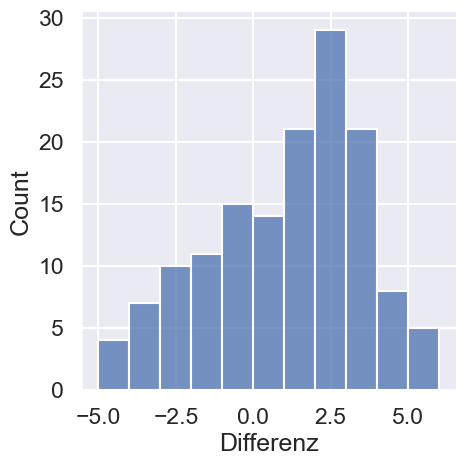

In [7]:
sns.displot(wuerfe, x='Differenz', bins=np.arange(-5, 7));

* deutliches Übergewicht bei den positiven Differenzen
* zufälliges Entstehen der Daten unwahrscheinlich

* Eine Aufgabe der schließenden Statistik wird sein, diese qualitative Aussage zu quantifizieren

Wir konstruieren das Balkendiagramm, wenn alle 36 möglichen Paare von Würfen gleich häufig auftreten würden

In [8]:
modell = pd.DataFrame()
modell['erster_Wurf'] = 6*[1,2,3,4,5,6]   #  fieser trick mit Listen
                                          # brauchen Sie nicht zu können
modell['zweiter_Wurf'] = 6*[1] + 6*[2] + 6*[3] + 6*[4] + 6*[5] + 6*[6]
modell.head(10)

,erster_Wurf,zweiter_Wurf
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,1,2
7,2,2
8,3,2
9,4,2


In [9]:
modell['Differenz'] = modell.zweiter_Wurf - modell.erster_Wurf

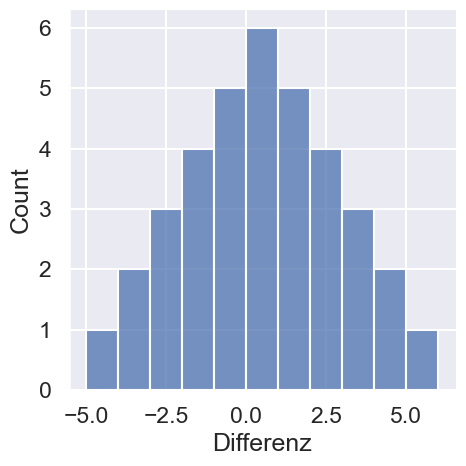

In [10]:
sns.displot(modell, x='Differenz', bins=np.arange(-5,7));

# Binomialverteilung

$$ B_{n,p}(k) = \binom np p^k (1-p)^k $$
ist die Wahrscheinlichkeit, bei $n$ unabhängigen Wiederholungen eine ja/nein-Experiments genau $k$ Erfolge zu beobachten

Mit `scipy`

    P = stats.binom(n,p)
    P.pmf(k)

# Kumulierte Verteilung

# Beispiel Parasiten

Bestimmte Fische erkranken mit 15% Wahrscheinlichkeit an einem Parasiten.

Wir beobachten 47 Fische.  Mit welcher Wahrscheinlichkeit erkranken genau 5 Fische?

$$ \begin{align*}
    B_{47, 0.15}(5)
    &= \begin{pmatrix}  47 \\ 5 \end{pmatrix} \cdot 0.15^5 \cdot 0.85^{42} \\
    &= 1533939 \cdot 0.0000759375 \cdot 0.0018541 \\
    &= 0.126433
\end{align*} $$

In [13]:
from scipy import stats

In [14]:
P = stats.binom(47, 0.15)

In [15]:
P.pmf(5)

0.12643265696974557

Die interessantere Frage ist:  Mit welcher Wahrscheinlichkeit erkranken höchstens 5 Fische?

| $$k$$    | $$B_{47, 0.15}(k)$$ |
|----------|---------------------|
| 0        | 0.00048             |
| 1        | 0.00399             |
| 2        | 0.01621             |
| 3        | 0.04292             |
| 4        | 0.08331             |
| 5        | 0.12643             |
| $$\sum$$ | 0.27335             |

* Die *kumulierten* Werte sind die Werte $P(0) + P(1) + \dots + P(k)$, wobei $k$ die Zahlen zwischen $0$ und $n$ durchläuft

* Mit `P.cdf` erhält man die kumulierte Verteilung von `P` 

`cdf`: cumulative distribution function (deutsch: Verteilungsfunktion)

In [16]:
P = stats.binom(47, 0.15)

In [17]:
P.cdf(5)

0.273346361465445

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/bar47.svg" alt="Graph der Binomialverteilung B(47, 0.10)" width="75%"/>

Wir haben die orange Fläche im Bild ausgerechnet.

Mit welcher Wahrscheinlichkeit erkranken mindesten 6 Fische?

* Die Wahrscheinlichkiet von "mindestens 6" ist die Komplementärwahrscheinlichkeit von "höchstens 5"
* Antwort: $1-0.27335 = 0.72665$

#### Fische in saubererem Wasser

* Es gelingt, die Erkrankungsraten der Fische um 5 Prozentpunkte auf 10% zu senken 
* Wie hoch ist nun die Wahrscheinlichkeit, dass 6 oder mehr Fische erkranken?

* Wir arbeiten wieder mit der Komplementärwahrscheinlichkeit
* Wie hoch ist nun die Wahrscheinlichkeit, dass höchstens 5 Fische erkranken?

* Jedenfalls größer als vorher:
    * saubereres Wasser:  weniger Fische erkranken
    * also steigt die Wahrscheinlichkeit, dass nur eine kleine Anzahl von Fischen erkrankt

In [ ]:
P = stats.binom(47, 0.10)
P.cdf(5)

* Die Wahrscheinlichkeit, dass 6 oder mehr Fische erkranken, beträgt also

In [ ]:
1 - P.cdf(5)

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/bar47_b.svg" alt="Graph der Binomialverteilung B(47, 0.10)" width="75%"/>

# Versuchsplanung

## Extinktionsexperiment

* Ein Extinktionsexperiment wird geplant, bei dem die Versuchstiere eine einmal erlernte Aufgabe wieder verlernen   sollen.  Dazu sollen zuerst mindestens 50 Tiere diese Handlung erlernen.  Aus früheren Versuchen weiß man, dass dies nur bei 80% der Versuchstiere gelingt. 

* Wenn man also zu Beginn der Verlernphase 50 Tiere haben will, welche die Aufgabe gelernt haben, dann muss man deutlich mehr als diese 50 Tiere trainieren.
* Wie viele?

Gegenfrage

* Welche Sicherheit will ich haben, dass genügend Tiere die Aufgabe erlernt haben werden?

* Sagen wir:  90%

* Nun muss man zweistufig vorgehen:  Für jedes feste $n$ schaut man nach, wie hoch die Wahrscheinlichkeit ist, dass 50 oder mehr Tiere die Aufgabe erlernt haben werden.  
* `P.cdf(k)` berechnet die Wahrscheinlichkeit, dass k oder weniger Tiere die Aufgabe erlernen
* Wir suchen also das kleinste n, so dass die Wahrscheinlichkeit, dass 49 oder weniger Tiere die Aufgabe erlernen, kleiner als 10% ist

In [21]:
P = stats.binom(70, 0.80)
P.cdf(49)  # wir verlangen, dass das kleiner als 0.10 ist

0.030308084751943774

In [22]:
P = stats.binom(65, 0.80)
P.cdf(49)   

0.21541354210671845

In [23]:
P = stats.binom(68, 0.80)
P.cdf(49) 

0.07269329945304003

In [24]:
P = stats.binom(67, 0.80)
P.cdf(49)   # muss kleiner 0.1  sein

0.10773154689999606

68 Tiere müssen trainiert werden

Geht auch grafisch mit `seaborn`

In [26]:
n = np.arange(50, 80)
P = stats.binom(n, 0.80)
B = P.cdf(49)

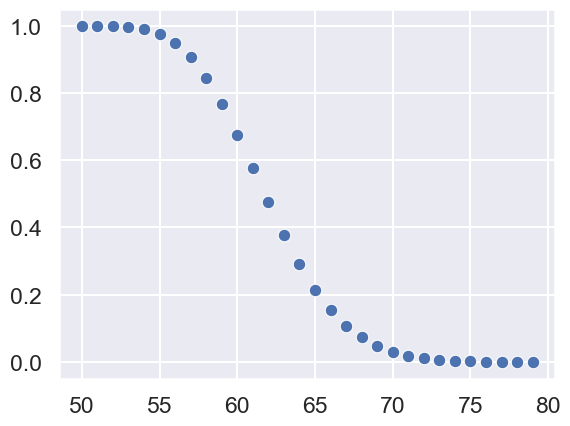

In [41]:
sns.scatterplot(x=n, y=B);

# Erwartungswert und Varianz von Zufallsvariablen

# Erwartungswert

* Der Erwartungswert ist derjenige Wert, den man im Mittel beobachten würde, wenn man das Experiment sehr oft wiederholt.

* Bei einer Lotterie ist der Erwartungswert der Betrag, bei dem die Lotterie fair wäre, bei dem also weder der Spieler noch der Betreiber langfristig Geld verlieren würde.

## Spiel 77

| Klasse | Ziffern | Gewinn $$ k $$ | $$P(X=k)$$ | $$ k \cdot P(X=k) $$ |
|--------|---------|---------------:|------------|----------------------|
|      I | 7       | 177777.00€     |   0.0000001| 0.018€               |
|     II | 6       |  77777.00€     |   0.0000010| 0.078€               |
|    III | 5       |   7777.00€     |   0.0000100| 0.078€               |
|     IV | 4       |    777.00€     |   0.0001000| 0.078€               |
|      V | 3       |     77.00€     |   0.0010000| 0.077€               |
|     VI | 2       |     17.00€     |   0.0100000| 0.170€               |
|    VII | 1       |      5.00€     |   0.1000000| 0.500€               |
| $\sum$ |         |                |            | 0.998€               |


$$     E(X) = 0.998\text{€}   $$

## Erwartungswert

* $ X $ eine diskrete Zufallsvariable
* Der *Erwartungswert* von $X$ ist
    \begin{equation*}
      E(X) = \sum_k P(X=k) \cdot k
    \end{equation*}
* Die Summe läuft über alle Werte $k$ von $X$

#### Beispiel: Würfel

Sei $ X $ die Augenzahl eines fairen Würfels.
  \begin{align*}
    E(X) &= \frac 16 \cdot 1 + \frac 16 \cdot 2 + \frac 16 \cdot 3 +
    \frac 16 \cdot 4 + \frac 16 \cdot 5 + \frac 16 \cdot 6 \\
    &= \frac{21}6 = \frac72 = 3.5
  \end{align*}

Im Mittel zeigt ein fairer Würfel $ 3.5 $ Augen

### Faire Variante des Spiels 77

* Der Einsatz beträgt 2.50€.  Bei welchem Hauptgewinn wäre das Spiel fair?
* Hauptgewinn sei $J$.  Dann
    \begin{align*}
      E(X) &= 0.000\,000\,1 \cdot J + 0.000\,001 \cdot 77\,777 \\
      &\qquad {} + 0.000\,01 \cdot 7\,777 + 0.000\,1 \cdot 777 \\
      &\qquad {} + 0.001 \cdot 77 + 0.01 \cdot 17 + 0.1 \cdot 5 \\
      &= 0.000\,000\,1 \cdot J + 0.980
    \end{align*}

* Das soll gleich 2.50 sein.  Also $ 0.000\,000\,1 \cdot J = 1.52 $
    \begin{equation*}
      J = \frac{1.52}{0.000\,000\,1} =  15\,200\,000
    \end{equation*}
* Spiel 77 ist fair bei einem Hauptgewinn von 15.2 Millionen €

## Varianz und Streuung

Die *Varianz* einer Zufallsvariablen $X$ ist definiert als

$$ \text{Var}(X) = \sum_{k=0}^\infty (k-\mu)^2 \cdot P(X=k)  $$

wobei $ \mu = E(X) $.

Die *Standardabweichung* oder *Streuung* von $X$ ist definiert als die Wurzel aus der Varianz

$$  \sigma = \sqrt{\text{Var}(X)}   $$

## Gleicher Erwartungswert, unterschiedliche Streuung

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/poissonBar16.svg" alt="zwei Verteilungen mit Erwartungswert 16" width="65%"/>

* Links:  Verteilung $X_1$ mit $E(X_1) = 16$ und $\sigma = 4$
* Rechts: Verteilung $X_2$ mit $E(X_2) = 16$ und $\sigma = 1.26$

## Beispiel: Fairer Würfel

* $X$ sei die Augenzahl eines fairen Würfels.  Der Erwartungswert von $X$ ist $\frac 72 = 3.5$
* Varianz der Augenzahlen beim fairen Würfel
        \begin{align*}
            \text{Var}(X) 
            &= \left(1 - \frac72\right)^2 \cdot \frac16 + \left(2 -
            \frac72\right)^2 \cdot \frac16 + \left(3 - \frac72\right)^2
            \cdot \frac16\\
            &\qquad{} + \left(4 - \frac72\right)^2 \cdot \frac16 + \left(5
            - \frac72\right)^2 \cdot \frac16 + \left(6 - \frac72\right)^2
            \cdot \frac16 \\
            &= \frac{35}{12} \\
            &= 2.91667
        \end{align*}

* Streuung

$$   \sigma = \sqrt{\frac{35}{12}} = 1.7078  $$

## Modell vs. Datensatz

|  Datensatz            | Modell         |
|-----------------------|----------------|
| arithmetisches Mittel | Erwartungswert |
| empirische Varianz    | Varianz        |
| Stichprobenstreuung   | Streuung       |


## Erwartungswert und Varianz der Binomialverteilung

Die Zufallsvariable $X$ sei binomialverteilt gemäß $B_{n,p}$

Dann
\begin{align*}
E(X) &= n \cdot p \\
\text{Var}(X) &= n \cdot p \cdot (1-p)
\end{align*}

#### Beispiel zur Varianz der Binomialverteilung

* Die Samen einer Pflanze haben eine Keimwahrscheinlichkeit von 75%
* Es werden 100 Samen ausgebracht
* Die Anzahl der Keimerfolge ist modelliert durch $B_{100,0.75}$

* Der Erwartungswert beträgt $100 \cdot 0.75 = 75$
* Man erwartet also 75 Keimerfolge

* Die Varianz beträgt $100 \cdot 0.75 \cdot 0.25 = 18.75$
* Die Streuung beträgt als $\sqrt{18.75} = 4.330$

Interpretation

* Wenn ich 71 Keimerfolge sehe, dann wundere ich mich nicht (Schwankung um eine Streuung)
* Wenn ich nur 62 Keimerfolge sehe, dann wundere ich mich (Schwankung um drei Streuungen)

####  Balkengraph der Anzahl der Keimerfolge

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/samen.svg" alt="Binomialverteilung B(100, 0.75)" width="75%"/>

## Rechenregeln

### Rechenregeln für den Erwartungswert

* Für jede Zahl $c$ und jede Zufallsvariable $X$ 
  ist $E(c \cdot X) = c \cdot E(X)$

* Für Zufallsvariablen $X_1, \dots, X_n$ gilt 
$$E(X_1 + \dots + X_n) = E(X_1) + \dots + E(X_n) $$

### Rechenregeln für die Varianz

* Für jede Zahl $a$ und jede Zufallsvariable $X$ gilt $\text{Var}(a + X) = \text{Var}(X)$
* Für Zahl $c$ und jede Zufallsvariable $X$ gilt $ \text{Var}(c\cdot X) = c^2 \cdot \text{Var}(X)$
* Für jede Zufallsvariable $X$ gilt $\text{Var}(X) = E(X^2) - E(X)^2$

# Unabhängigkeit von Zufallsvariablen

Zwei diskrete Zufallsvariable $X$ und $Y$ sind *stochastisch unabhängig,* wenn für alle möglichen Werte $k$
und $m$

$$ P(X=k, Y=m) = P(X=k) \cdot P(Y=m) $$

Die Unabhängigkeit muss durch die Versuchsplanung gesichert werden

## Zusätzliche Rechenregeln für unabhängige Zufallsvariable

*Produktformel für den Erwartungswert:* $X$ und $Y$ seien **unabhängige** Zufallsvariable.  Dann

$$ E(X \cdot Y) = E(X) \cdot E(Y) $$

*Summenformel* für die Varianz: $X$ und $Y$ seien **unabhängige** Zufallsvariable.  Dann 

$$  \text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)  $$

# Das schwache Gesetz der großen Zahl

## Messwiederholungen

* Warum erhöhen mehrere Messungen die Genauigkeit?
* Warum braucht man 100-mal so viele Messungen, um die Genauigkeit zu verzehnfachen?

## Zwei unabhängige, identisch verteilte Zufallsvariable

* $X_1$ und $X_2$ seien unabhängige Zufallsvariable, die derselben Verteilung gehorchen (also z.B. Messwiederholungen).  Sei $Y = \frac12(X_1+X_2)$ der Durchschnittswert.
* Der Erwartungswert von $X_1$ heiße $\mu$, also $E(X_1) = E(X_2) = \mu$ 
* Die Streuung von $X_1$ heiße $\sigma$, also $\text{Var}(X_1) = \text{Var}(X_2) = \sigma^2$

* $E(Y) = \frac12(E(X_1)+E(X_2)) = \mu$
* $\text{Var}(Y) = \left(\frac12\right)^2 \text{Var}(X_1) + \left(\frac12\right)^2 \text{Var}(X_2) = \frac14 \sigma^2 + \frac14
\sigma^2 = \frac12 \sigma^2$
* Also ist $\displaystyle \frac{\sigma}{\sqrt2}$ die Streuung von $Y$

## Das schwache Gesetz der großen Zahl

* "Mit ausreichend vielen Messwiederholungen lässt sich jede Genauigkeit erreichen"
* Präziser: $X_1, \dots, X_n$ unabhängig, alle mit derselben Verteilung 
* $\mu = E(X_1) = \dots = E(X_n)$ und $\sigma^2 = \text{Var}(X_1) = \dots = \text{Var}(X_n)$

* $\displaystyle Y = \frac1n (X_1 + \dots + X_n)$ 
* $Y$ ist das arithmetische Mittel der $X_1, X_2, \dots, X_n$

* Dann $E(Y) = \mu$ und die Streuung von $Y$ beträgt

$$  \sigma_Y = \frac\sigma{\sqrt n}  $$

* Das bedeutet:  Um die Streuung zu zehnteln, müssen 100 mal so viele Versuche durchgeführt werden